<p> <img src="https://drive.google.com/uc?export=view&id=14ecpPr37UaWMNtZYQ3TgLyvYO6Wgh-qA" align="right" width="200px"> </p>

# Atividade 5 - Análise Coautoria de Pesquisas PPGIA<br>
AIRES, Marcos. CARUBBI, Ricardo. SIQUEIRA, Fernando. Alunos de Análise de Dados em Grafos.<br>
Professor orientador: Prof. Dr. Raimir Holanda.<br>
Programa de Pós-Graduação em Informática Aplicada. Universidade de Fortaleza - UNIFOR.




## Configurações

In [1]:
# Endereço da base de dados
local = '/content/drive/MyDrive/Colab Notebooks/GRAFOS/P3/'
csvfile = local + 'ppgia_coautoria-bipartite.csv'

# Configuração de plotagem
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({
    'figure.figsize': (30, 30),
    'axes.spines.right': False,
    'axes.spines.left': False,
    'axes.spines.top': False,
    'axes.spines.bottom': False})

# Fixação do seed
from numpy import random as nprand
seed = 200
nprand.seed(seed)

# Importação dos módulos do NetworkX
import networkx as nx
from networkx import bipartite
from networkx import NetworkXError
from networkx import edge_betweenness_centrality
from networkx.algorithms.community import greedy_modularity_communities
from networkx.algorithms.community.centrality import girvan_newman

#Importação dos módulos de suporte
import re, random, itertools
from numpy import random as nprand
import pandas as pd

# ignoring warnings
import warnings
warnings.simplefilter("ignore")

## Preprocessamento dos dados

In [2]:
_autor_union = pd.read_csv(local + 'lst_autorunion.csv', sep=';')
_autorias    = pd.read_csv(local + 'ppgia_coautoria-bipartite.csv',sep=';')
autorias        = pd.DataFrame(_autorias)
lst_autor       = sorted(set(autorias['AUTORES'].unique()))

print('Quantidade de Autores Antes: ',len(lst_autor))

for n in range(len(autorias['AUTORES'])):
    rem_acentos = autorias['AUTORES'][n].replace("\'","").replace("De ", "de ").replace("Das ","das ").replace("Da ","da ").replace("Do ","do ").replace("Dos ","dos ").replace("Á","A").replace("á","a").replace("â","a").replace("ã","a").replace("à","a").replace("é","e").replace("ê","e").replace("'è","e").replace("í","i").replace("ó","o").replace("ô","o").replace("ú","u")
    autorias['AUTORES'][n]=rem_acentos.replace("\"","").strip()

    for m in range(len(_autor_union)):
        n1=str(autorias['AUTORES'][n]).strip()
        n2=str(_autor_union['NomeDe'][m]).replace('\'','').strip()
#         print(n1, n2)
        if n1 == n2:
#             print(' Alteração de:',n2)
            corrigido=str(_autor_union['NomePara'][m]).replace("\'","").strip()
            autorias['AUTORES'][n]=corrigido.replace("\"","").strip()
#             print('Alterado para:',autorias['AUTORES'][n])

print(sorted(set(autorias['AUTORES'].unique())))

autorias.to_csv(local + 'ppgia_coautorias.csv', sep=";", index=False)
lst_autor  = sorted(set(autorias['AUTORES'].unique()))
print('-'*90)
print('Quantidade de Autores Depois:',len(lst_autor))

Quantidade de Autores Antes:  984
['A Aguiar Vieira', 'A C G Varela', 'A C Gastaldi', 'A C Pascalicchio', 'A C da S Barros', 'A Galis', 'A Hohl', 'A M Baptista', 'A M P Canuto', 'A Maraschini', 'A R Alexandria', 'A S Iwashita', 'A T Marques', 'Abdul Waheed', 'Abhinav Lal', 'Abhishek Swaroop', 'Aboul Ella Hassanien', 'Adauto R de Carvalho', 'Adriana Carlos Paz', 'Adriana P do Nascimento', 'Adriana Sayuri Iwashita', 'Adriano Bessa Albuquerque', 'Adriano Melo', 'Adriano de Carvalho', 'Ahmed Faeq Hussein', 'Aicha Sekhari', 'Alan M Braga', 'Albuquerque', 'Aldir Sousa', 'Aldisio Gonçalves Medeiros', 'Alex A Lins', 'Alex Lacerda Ramos', 'Alexandre Marcos Lins de Vasconcelos', 'Alexandre Xavier Falcao', 'Alexei Barbosa de Aguiar', 'Ali Hassan Sodhro', 'Aloisio Vieira Lira Neto', 'Alvaro A Villa Ochoa', 'Alvaro de Meneses Sobreira Neto', 'Alvinice Kodjo', 'Amanda Drielly Pires Venceslau', 'Amarjeet Mohanty', 'Amauri H Souza Junior', 'Amaury Teofico Brasil Filho', 'Ambarish G Mohapatra', 'Americ

## Grafo Bipartido

In [3]:
# Criação do grafo não direcionado vazio
B = nx.Graph()

# Carregamento dos dados no grafo
with open(local + 'ppgia_coautorias.csv') as f:
    # Parse cabeçalho
    cols = next(f).strip().split(";")[1:]
    cols = [item.lower() for item in cols]
    # Parse linhas
    for row in f:
        # Limpeza grossa
        rlist = ['&Lt;/I&Gt;', '&Lt;/B&Gt;']
        for r in rlist:
            row = re.sub(r, '', row)
        row = row.replace('Dama?Evi&Amp;#269;Ius', 'Damasevicius')
        # Definição dos nós
        linha = row.strip().split(";")
        artigo = linha[1]
        autor = linha[2]
        B.add_edge(autor, artigo)
        # Definição dos atributos dos nós
        B.nodes[autor]["bipartite"] = 0
        B.nodes[artigo]["bipartite"] = 1
# Considerando apenas componentes concectados
B = B.subgraph(list(nx.connected_components(B))[0])  

In [4]:
# Identificação dos nós
autores = [v for v in B.nodes if B.nodes[v]["bipartite"] == 0]
artigos = [v for v in B.nodes if B.nodes[v]["bipartite"] == 1]

In [5]:
print('Número de autores', len(autores))
print('Número de artigos', len(artigos))

Número de autores 828
Número de artigos 478


In [6]:
#@title
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.bipartite_layout(B, autores)
# Draw using different shapes and colors for autores/titulos
nx.draw_networkx_edges(B, pos, width=3, alpha=0.05)
nx.draw_networkx_nodes(B, pos, nodelist=artigos, node_color="#bfbf7f", node_shape="h", node_size=300)
nx.draw_networkx_nodes(B, pos, nodelist=autores, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(B, pos, alpha=.5)
plt.savefig(local + 'GRAFO_P3-1.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
# Identificação dos autores com mais artigos publicados.
degree = B.degree
[(x, degree[x]) for x in sorted(autores, key=lambda x:B.degree[x], reverse=True)[:10]]

[('Victor Hugo Costa de Albuquerque', 166),
 ('Placido Rogerio Pinheiro', 123),
 ('Joao Jose Vasco Peixoto Furtado', 42),
 ('Maria Elizabeth Sucupira Furtado', 40),
 ('Pedro Pedrosa Rebouças Filho', 38),
 ('Maria Andreia Formico Rodrigues', 36),
 ('Joel Jose Puga Coelho Rodrigues', 36),
 ('Andre Luis Vasconcelos Coelho', 32),
 ('J M R S Tavares', 30),
 ('Adriano Bessa Albuquerque', 28)]

## Grafo Monopartido (Projeção)

In [8]:
# Create co-affiliation network
G = bipartite.projected_graph(B, autores)
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.05)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(G, pos, alpha=.75)
plt.savefig(local + 'GRAFO_P3-2.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

In [9]:
# Create co-affiliation network
H = bipartite.projected_graph(B, artigos)
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(H, k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(H, pos, width=3, alpha=0.05)
nx.draw_networkx_nodes(H, pos, node_color="#bfbf7f", node_shape="h", node_size=300)
nx.draw_networkx_labels(H, pos, alpha=.25)
plt.savefig(local + 'GRAFO_P3-2.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

## Grafo Monopartido Ponderado (Projeção)

In [10]:
G = bipartite.weighted_projected_graph(B, autores)
# list(G.edges(data=True))[0][2]['weight']
# for i in list(G.edges(data=True)):
#     print(i[2]['weight'])
sorted(G.edges(data=True), key=lambda t: t[2].get('weight', 1), reverse=True)[:10]

[('Victor Hugo Costa de Albuquerque',
  'Pedro Pedrosa Rebouças Filho',
  {'weight': 38}),
 ('Victor Hugo Costa de Albuquerque', 'J M R S Tavares', {'weight': 30}),
 ('Victor Hugo Costa de Albuquerque', 'Joao Paulo Papa', {'weight': 23}),
 ('Victor Hugo Costa de Albuquerque',
  'Joel Jose Puga Coelho Rodrigues',
  {'weight': 22}),
 ('Placido Rogerio Pinheiro', 'Isabelle Tamanini', {'weight': 20}),
 ('Placido Rogerio Pinheiro',
  'Mirian Caliope Dantas Pinheiro',
  {'weight': 20}),
 ('Victor Hugo Costa de Albuquerque', 'Khan Muhammad', {'weight': 19}),
 ('Placido Rogerio Pinheiro', 'Adriano Bessa Albuquerque', {'weight': 17}),
 ('Victor Hugo Costa de Albuquerque',
  'Joao Manuel R S Tavares',
  {'weight': 13}),
 ('Placido Rogerio Pinheiro', 'Ana Karoline Araujo de Castro', {'weight': 12})]

In [11]:
# Create co-affiliation network using the Jaccard index
G = bipartite.overlap_weighted_projected_graph(B, autores)
# Create figure
plt.figure(figsize=(30,30))
# Get weights
weight = [G.edges[e]['weight'] for e in G.edges]
# Calculate layout
pos = nx.spring_layout(G, weight='weight', k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, edge_color=weight, edge_cmap=plt.cm.Blues, width=3, alpha=0.25)
nx.draw_networkx_nodes(G, pos, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(G, pos, alpha=.75)
plt.savefig(local + 'GRAFO_P3-3.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

In [12]:
# Identificação dos autores com maior colaboração com outros autores.
degree = G.degree
[(x, degree[x]) for x in sorted(autores, key=lambda x:G.degree[x], reverse=True)[:10]]

[('Victor Hugo Costa de Albuquerque', 355),
 ('Placido Rogerio Pinheiro', 155),
 ('Joel Jose Puga Coelho Rodrigues', 101),
 ('Pedro Pedrosa Rebouças Filho', 86),
 ('Joao Jose Vasco Peixoto Furtado', 73),
 ('Joao Batista Furlan Duarte', 72),
 ('Nabor das Chagas Mendonça', 65),
 ('Maria Elizabeth Sucupira Furtado', 59),
 ('Raimir Holanda Filho', 56),
 ('Joao Paulo Papa', 51)]

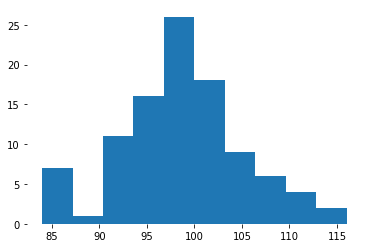

In [13]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

In [14]:
# Identificação dos autores que atuam com 'pontes'.
betweenness = nx.betweenness_centrality(G, normalized=False)
sorted(betweenness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Victor Hugo Costa de Albuquerque', 164244.47125054593),
 ('Placido Rogerio Pinheiro', 112862.21286012183),
 ('Joao Batista Furlan Duarte', 54786.16115909765),
 ('Joao Jose Vasco Peixoto Furtado', 50207.154911578706),
 ('Ricardo Luiz Costa Holanda Filho', 46521.23501024486),
 ('Nabor das Chagas Mendonça', 40640.38549016848),
 ('Maria Elizabeth Sucupira Furtado', 35189.9832308391),
 ('Maria Andreia Formico Rodrigues', 31323.642424168185),
 ('Raimir Holanda Filho', 27861.842139456206),
 ('Andre Luis Vasconcelos Coelho', 24639.563080582877)]

In [15]:
# Identificação do autores altamente concectados (hubs)..
eigenvector = nx.eigenvector_centrality(G)
sorted(eigenvector.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Nabor das Chagas Mendonça', 0.1815982535287857),
 ('Marco Tulio Oliveira Valente', 0.17723922065389988),
 ('Uira Kulesza', 0.17349779457986414),
 ('Vander Alves', 0.17349779457986414),
 ('Roberta Coelho', 0.17349779457986414),
 ('Eduardo Figueiredo', 0.17349779457986414),
 ('Paulo F Pires', 0.17349779457986414),
 ('Flavia C Delicato', 0.17349779457986414),
 ('Eduardo Piveta', 0.17349779457986414),
 ('Carla Silva', 0.17349779457986414)]

In [16]:
# Quantificação da distância entre um autor e o resto do grafo.
closeness = nx.closeness_centrality(G)
sorted(closeness.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Victor Hugo Costa de Albuquerque', 0.507050889025138),
 ('Placido Rogerio Pinheiro', 0.5021250758955677),
 ('Raimir Holanda Filho', 0.4384941675503712),
 ('Joel Jose Puga Coelho Rodrigues', 0.4368726888536714),
 ('Andre Luis Vasconcelos Coelho', 0.4305049453409682),
 ('Joao Batista Furlan Duarte', 0.4251928020565553),
 ('Adriano Bessa Albuquerque', 0.4238851870835469),
 ('Pedro Pedrosa Rebouças Filho', 0.42366803278688525),
 ('Joel Rodrigues', 0.4232343909928352),
 ('Deepak Gupta', 0.41599597585513076)]

In [17]:
# Quantificação no número de triângulos entre um autor e o resto dos seus vizinhos.
triangles = nx.triangles(G)
sorted(triangles.items(), key=lambda x:x[1], reverse=True)[0:10]

[('Victor Hugo Costa de Albuquerque', 1302),
 ('Nabor das Chagas Mendonça', 553),
 ('Marco Tulio Oliveira Valente', 520),
 ('Uira Kulesza', 496),
 ('Vander Alves', 496),
 ('Roberta Coelho', 496),
 ('Eduardo Figueiredo', 496),
 ('Paulo F Pires', 496),
 ('Flavia C Delicato', 496),
 ('Eduardo Piveta', 496)]

In [18]:
# Quantificação do coeficiente de clustering dos autores.
clustering = nx.clustering(G)
# sorted(clustering.items(), key=lambda x:x[1], reverse=True)[0:10]
[(x, clustering[x]) for x in sorted(autores, key=lambda x:eigenvector[x], reverse=True)[:10]]

[('Nabor das Chagas Mendonça', 0.2658653846153846),
 ('Marco Tulio Oliveira Valente', 0.6039488966318235),
 ('Uira Kulesza', 1.0),
 ('Vander Alves', 1.0),
 ('Roberta Coelho', 1.0),
 ('Eduardo Figueiredo', 1.0),
 ('Paulo F Pires', 1.0),
 ('Flavia C Delicato', 1.0),
 ('Eduardo Piveta', 1.0),
 ('Carla Silva', 1.0)]

## Paths and Disitances

In [19]:
def path_length_histogram(G, title=None):
    # Find path lengths
    length_source_target = dict(nx.shortest_path_length(G))
    # Convert dict of dicts to flat list
    all_shortest = sum([
        list(length_target.values())
        for length_target
        in length_source_target.values()],
    [])
    # Calculate integer bins
    high = max(all_shortest)
    bins = [-0.5 + i for i in range(high + 2)]
    # Plot histogram
    plt.hist(all_shortest, bins=bins)
    plt.title(title)
    plt.xlabel("Distance")
    plt.ylabel("Count")

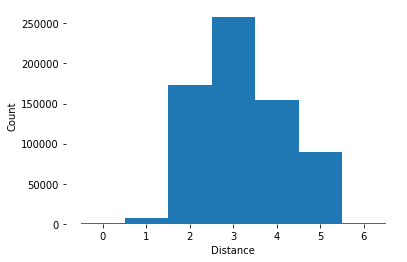

In [20]:
# Networks can be characterized according to their distribution of shortest path lengths.
path_length_histogram(G)

In [21]:
# Mean shortest path length (characteristic length)
print(nx.average_shortest_path_length(G))

# Size of a network characterized by the largest path length (diameter)
nx.diameter(G)

3.2148414909836496


6

## Global clustering

In [22]:
# Transitivity: the fraction of possible triangles that are present.
nx.transitivity(G)

0.2671168110724317

In [23]:
# Global clustering coefficient.
nx.average_clustering(G)

0.8731075664968962

In [24]:
# Density of a network  the fraction of possible edges that exist.
# The more edges present in a network, the more redundant paths exist between its nodes.
d = nx.density(G)
print(d)

0.01121275315586866


## Connectivity

In [25]:
# The node connectivity is the smallest min-cut over all node pairs. 
print(nx.minimum_node_cut(G))

# The edge connectivity is defined similarly.
print(nx.minimum_edge_cut(G))

# Average the connectivity over all nodes or edges
# print(nx.average_node_connectivity(G)) # tempo de execução > 40min

{'Placido Rogerio Pinheiro'}
{('Andre Luis Vasconcelos Coelho', 'F O de França')}


In [26]:
# It seems the network can be divided into disconnected parts 
# by the removal of a single node or single edges.
print(nx.node_connectivity(G))
print(nx.edge_connectivity(G))

1
1


## Cliques

In [27]:
cliques = list(nx.find_cliques(G))
print(len(cliques))

408


In [28]:
# Find maximum clique
max_clique = max(cliques, key=len)
print('Pesquisadores max_clique:', len(max_clique))
max_clique

Pesquisadores max_clique: 33


['Roberta Coelho',
 'Eduardo Figueiredo',
 'Sergio Castelo Branco Soares',
 'Paulo Henrique Monteiro Borba',
 'Paulo F Pires',
 'Paulo Masiero',
 'Vander Alves',
 'Fernando Castor',
 'Ricardo Ramos',
 'Uira Kulesza',
 'Julio Leite',
 'Flavia C Delicato',
 'Fabio Silveira',
 'Arndt Von Staa',
 'Otavio Lemos',
 'Nabor das Chagas Mendonça',
 'Claudio SantAnna',
 'Nelio Cacho',
 'Valter Camargo',
 'Fabiano Ferrari',
 'Carla Silva',
 'Rosana Braga',
 'Lyrene Silva',
 'Rosangela Penteado',
 'Rodrigo Bonifacio',
 'Jaelson Castro',
 'Eduardo Piveta',
 'Fernanda Alencar',
 'Cecilia Rubira',
 'Christina Chavez',
 'Thais Batista',
 'Marco Tulio Oliveira Valente',
 'Carlos Lucena']

In [29]:
# Create figure
plt.figure(figsize=(30,30))
# Visualize maximum clique
node_color = [(0.5, 0.5, 0.5) for v in G.nodes()]
for i, v in enumerate(G.nodes()):
    if v in max_clique:
        node_color[i] = (0.5, 0.5, 0.9)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G, pos, width=3, alpha=0.05)
nx.draw_networkx_nodes(G, pos, node_color=node_color, alpha=.5)
nx.draw_networkx_labels(G, pos, alpha=.1)
plt.savefig(local + 'GRAFO_P3-4.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

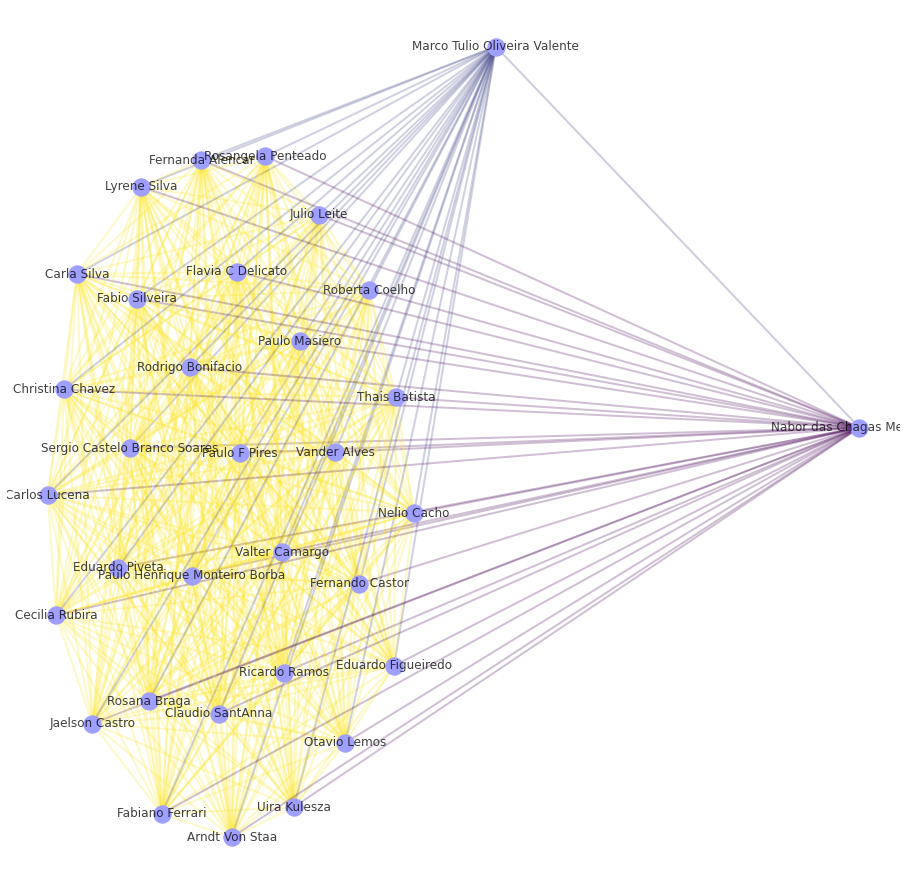

In [30]:
# Create max_clique network
G_maxclique = nx.subgraph(G, max_clique)
# Create figure
plt.figure(figsize=(16,16))
# Get weights
weight = [G_maxclique.edges[e]['weight'] for e in G_maxclique.edges]
# Calculate layout
pos_maxclique = nx.spring_layout(G_maxclique, weight='weight', k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G_maxclique, pos_maxclique, edge_color=weight, width=2, alpha=0.25)
nx.draw_networkx_nodes(G_maxclique, pos_maxclique, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(G_maxclique, pos_maxclique, alpha=.75)
plt.savefig(local + 'GRAFO_P3-5.png', dpi=150)

In [31]:
print('Densidade:', nx.density(G_maxclique))
print('Nós isolados:', list(nx.isolates(G_maxclique)))
print('Conectado:', nx.is_connected(G_maxclique))
print('Coef. Clustering médio:',nx.average_clustering(G_maxclique))
print('Distância média entre nós:', nx.average_shortest_path_length(G_maxclique))

Densidade: 1.0
Nós isolados: []
Conectado: True
Coef. Clustering médio: 1.0
Distância média entre nós: 1.0


## K-Cores

In [32]:
# Find k-cores
# A k-core is a maximal subgraph that contains nodes of degree k or more.
G_core_10 = nx.k_core(G, 10)
G_core_20 = nx.k_core(G, 20)

In [33]:
# Create figure
plt.figure(figsize=(30,30))
# Visualize network and k-cores
nx.draw_networkx(G, pos=pos, node_size=50, edge_color="#333333", alpha=0.05, with_labels=False)
nx.draw_networkx(G_core_10, pos=pos, node_size=50, node_color="#7F7FEF", edge_color="#7F7FEF", alpha=0.75, with_labels=False)
nx.draw_networkx(G_core_20, pos=pos, node_size=50, node_color="#AFAF33", edge_color="#AFAF33", alpha=0.75, with_labels=False)
plt.savefig(local + 'GRAFO_P3-6.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

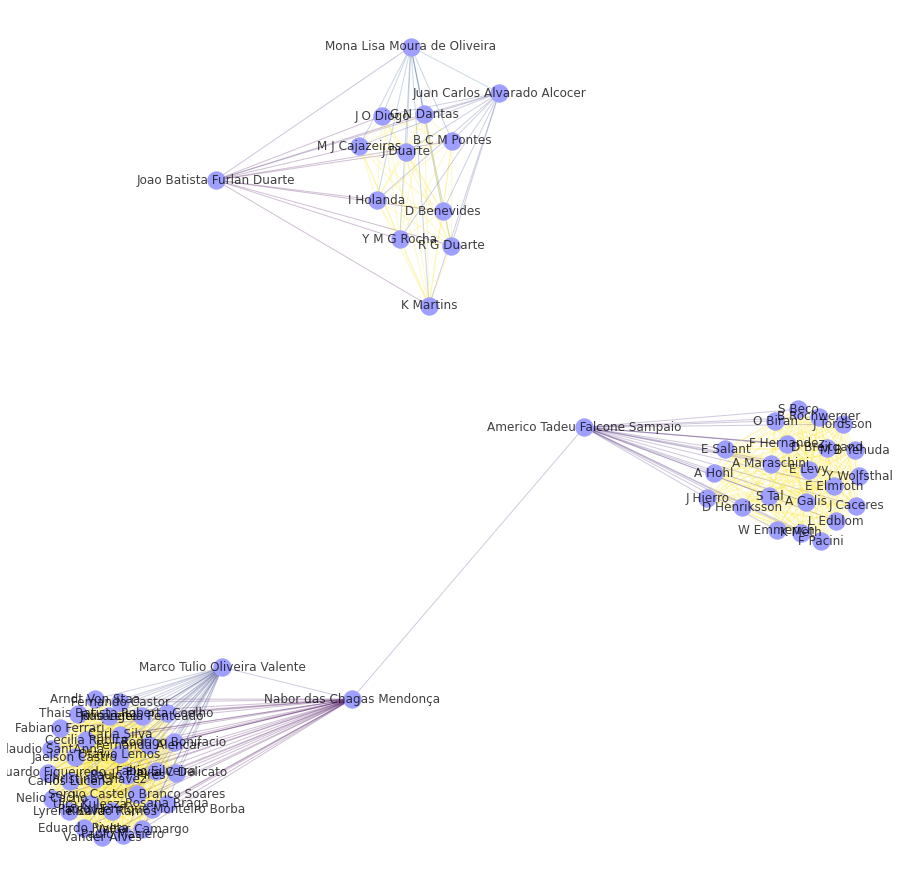

In [34]:
# Create G_core_10 network
G_core_10 = nx.subgraph(G, G_core_10)
# Create figure
plt.figure(figsize=(16,16))
# Get weights
weight = [G_core_10.edges[e]['weight'] for e in G_core_10.edges]
# Calculate layout
pos_G_core_10 = nx.spring_layout(G_core_10, weight='weight', k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G_core_10, pos_G_core_10, edge_color=weight, width=1, alpha=0.25)
nx.draw_networkx_nodes(G_core_10, pos_G_core_10, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(G_core_10, pos_G_core_10, alpha=.75)
plt.savefig(local + 'GRAFO_P3-7.png', dpi=150)

In [35]:
print('Densidade:', nx.density(G_core_10))
print('Nós isolados:', list(nx.isolates(G_core_10)))
print('Conectado:', nx.is_connected(G_core_10))
print('Coef. Clustering médio:',nx.average_clustering(G_core_10))
#print('Distância média entre nós:', nx.average_shortest_path_length(G_core_10))

Densidade: 0.36658141517476556
Nós isolados: []
Conectado: False
Coef. Clustering médio: 0.9978614118500697


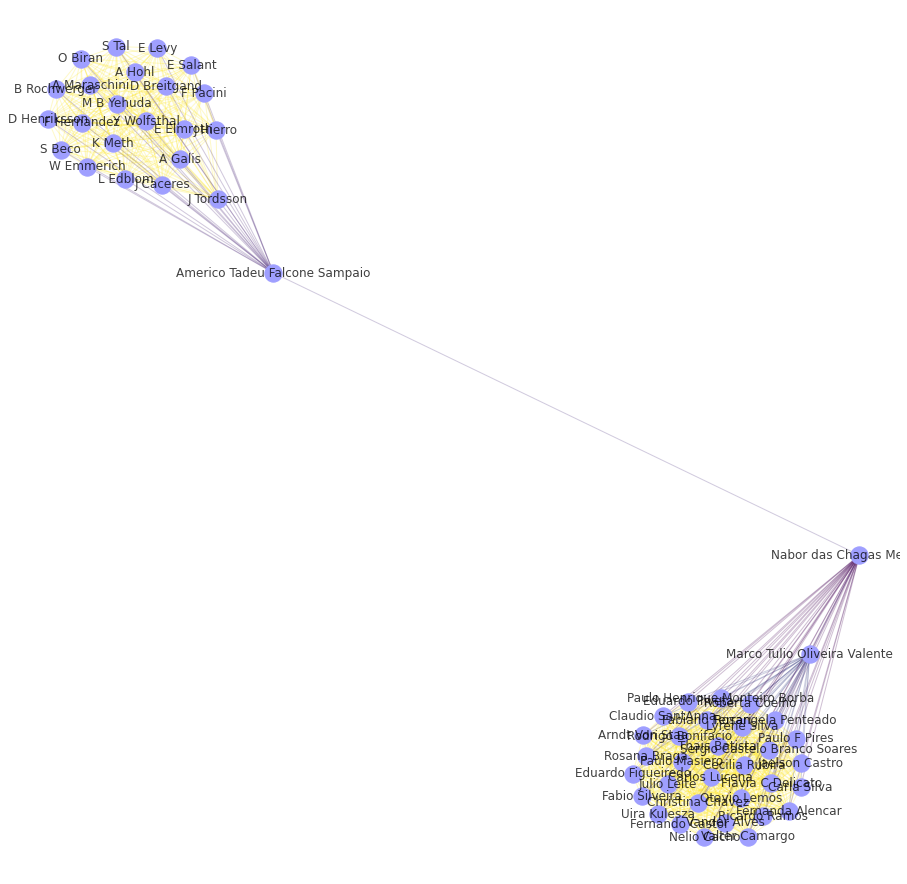

In [36]:
# Create G_core_20 network
G_core_20 = nx.subgraph(G, G_core_20)
# Create figure
plt.figure(figsize=(16,16))
# Get weights
weight = [G_core_20.edges[e]['weight'] for e in G_core_20.edges]
# Calculate layout
pos_G_core_20 = nx.spring_layout(G_core_20, weight='weight', k=0.5)
# Draw edges, nodes, and labels
nx.draw_networkx_edges(G_core_20, pos_G_core_20, edge_color=weight, width=1, alpha=0.25)
nx.draw_networkx_nodes(G_core_20, pos_G_core_20, node_color="#9f9fff", node_size=300)
nx.draw_networkx_labels(G_core_20, pos_G_core_20, alpha=.75)
plt.savefig(local + 'GRAFO_P3-8.png', dpi=150)

In [37]:
print('Densidade:', nx.density(G_core_20))
print('Nós isolados:', list(nx.isolates(G_core_20)))
print('Conectado:', nx.is_connected(G_core_20))
print('Coef. Clustering médio:',nx.average_clustering(G_core_20))
print('Distância média entre nós:', nx.average_shortest_path_length(G_core_20))

Densidade: 0.5077922077922078
Nós isolados: []
Conectado: True
Coef. Clustering médio: 0.9973649538866931
Distância média entre nós: 1.9493506493506494


## Community Detection

### Modularity maximization
Find communities in graph using Clauset-Newman-Moore greedy modularity maximization.

In [38]:
# Find the communities
communities = sorted(greedy_modularity_communities(G), key=len, reverse=True)
# Count the communities
print('Total de comunidades:', len(communities))
print('Elementos maior comunidade:', len(communities[0]))

Total de comunidades: 22
Elementos maior comunidade: 105


In [39]:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1
            
def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

In [40]:
def get_color(i, r_off=1, g_off=1, b_off=1):
    r0, g0, b0 = 0, 0, 0
    n = len(communities)
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b)

In [41]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

In [42]:
# Create figure
plt.figure(figsize=(30,30))
# Calculate layout
pos = nx.spring_layout(G)
# Draw external edges
nx.draw_networkx_edges(G, pos, edgelist=external, edge_color="#333333")
# Draw nodes and internal edges
nx.draw_networkx_edges(G, pos, edgelist=internal, edge_color=internal_color, alpha=.9)
nx.draw_networkx_nodes(G, pos, node_color=node_color, node_size=300, alpha=.25)
# Draw labels
nx.draw_networkx_labels(G, pos, alpha=.25)
plt.savefig(local + 'GRAFO_P3-9.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.

### Girvan-Newman Community Detection

In [43]:
result = girvan_newman(G)
communities = next(result)
len(communities)

2

In [44]:
# Set node and edge communities
set_node_community(G, communities)
set_edge_community(G)

In [45]:
# Set community color for nodes
node_color = [get_color(G.nodes[v]['community']) for v in G.nodes]

# Set community color for internal edges
external = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in G.edges if G.edges[v, w]['community'] > 0]
internal_color = [get_color(G.edges[e]['community']) for e in internal]

In [46]:
# Create figure
plt.figure(figsize=(30,30))
# Draw external edges
nx.draw_networkx(
    G, pos=pos, node_size=0,
    edgelist=external, edge_color="#333333", with_labels=False)
# Draw internal edges
nx.draw_networkx_edges(G, pos, edgelist=internal, edge_color=internal_color)
# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color=node_color, alpha=.5)
# Draw lables
nx.draw_networkx_labels(G, pos, alpha=.25)
plt.savefig(local + 'GRAFO_P3-10.png', dpi=150)

Output hidden; open in https://colab.research.google.com to view.